In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
file_path = "./tratamiento_de_valores_faltantes-1.csv"
df = pd.read_csv(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      482 non-null    float64
 1   x2      480 non-null    object 
 2   x3      486 non-null    float64
 3   x4      483 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


In [3]:
df.head()

,x1,x2,x3,x4
0,1.307150,Comida rápida,5.249548,2.790293
1,18.422083,Mexicano,5.278007,3.330853
2,7.729605,Italiano,7.403145,2.895753
3,10.599776,Comida rápida,7.209577,3.393178
4,5.612505,Chino,5.896599,2.901199


In [4]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

Variables numéricas: ['x1', 'x3', 'x4']
Variables categóricas: ['x2']


<Figure size 1200x600 with 0 Axes>

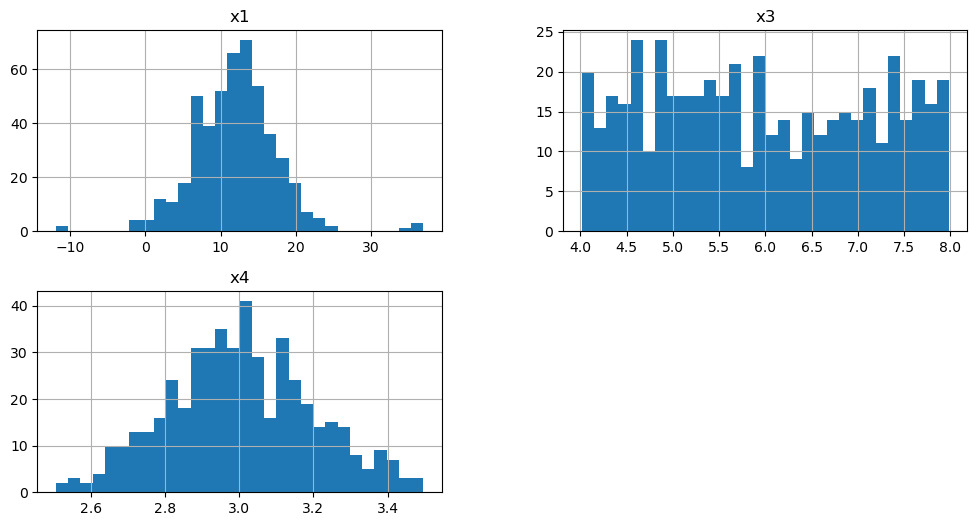

In [5]:
plt.figure(figsize=(12, 6))
df[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

<Figure size 1200x600 with 0 Axes>

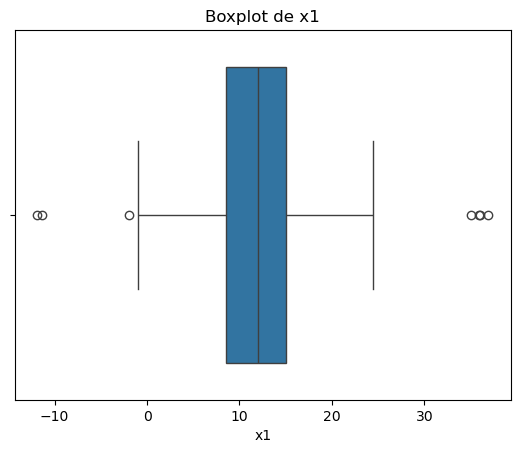

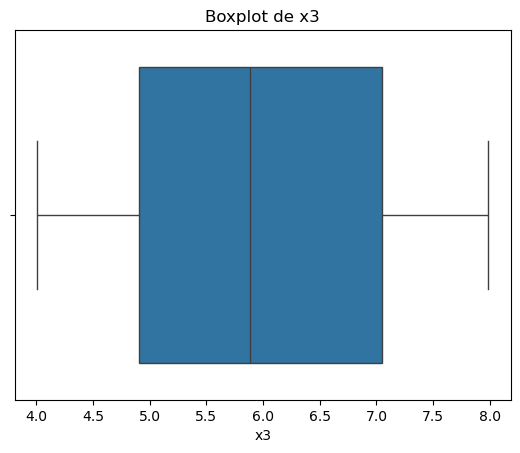

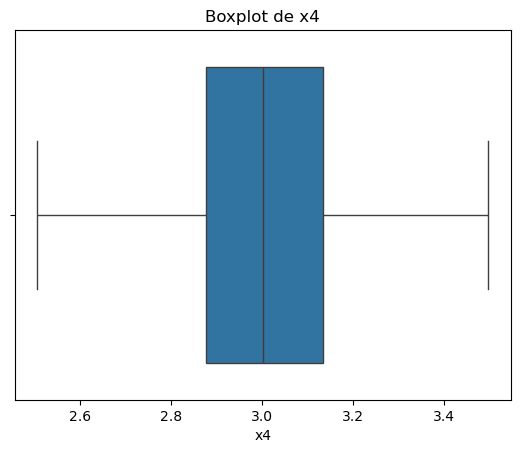

In [6]:
plt.figure(figsize=(12, 6))
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

In [7]:
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])

Valores faltantes por columna:
x1    18
x2    20
x3    14
x4    17
dtype: int64


In [8]:
warnings.filterwarnings("ignore")

# Para variables numéricas, usamos mediana para evitar sesgos en la distribución
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Valores faltantes en {col} reemplazados por la mediana")

# Para variables categóricas, usamos moda
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Valores faltantes en {col} reemplazados por moda")


print("Valores faltantes post tratamiento:")
print(df.isnull().sum())

Valores faltantes en x1 reemplazados por la mediana
Valores faltantes en x3 reemplazados por la mediana
Valores faltantes en x4 reemplazados por la mediana
Valores faltantes en x2 reemplazados por moda
Valores faltantes post tratamiento:
x1    0
x2    0
x3    0
x4    0
dtype: int64


In [9]:
#df.to_csv("tarea2.1.csv", index=False)
df

,x1,x2,x3,x4
0,1.307150,Comida rápida,5.249548,2.790293
1,18.422083,Mexicano,5.278007,3.330853
2,7.729605,Italiano,7.403145,2.895753
3,10.599776,Comida rápida,7.209577,3.393178
4,5.612505,Chino,5.896599,2.901199
...,...,...,...,...
495,7.851055,Tailandés,4.159333,3.100521
496,12.174165,Comida rápida,6.004050,2.917600
497,10.984803,Italiano,6.017403,2.979846
498,7.420852,Chino,7.327392,2.819767
